# IMDB Deep learning

## Table Of Contents:
[Introduction](#intro)

1. [Defining the problem and assembling a dataset](#wf-1)
2. [Choosing a measure of success](#wf-2)
3. [Deciding on an evaluation protocol](#wf-3)
4. [Preparing your data](#wf-4)
5. [Developing a model that does better than a baseline](#wf-5)
6. [Scaling up: developing a model that overfits](#wf-6)
    1. [Model One](#m-1)
    2. [Model Two](#m-2)
    3. [Model Three](#m-3)
    4. [Model Four](#m-4)
7. [Regularizing your model and tuning your hyperparameters](#wf-5)

[Modular Code](#mc)
1. [Decode a review](#mc-1)
2. [Vectorize Sequences](#mc-2)
3. [Plot Training and validation loss ](#mc-3)
4. [Plot Training and validation accuracy ](#mc-4)

## Introduction <a class="anchor" id="intro"></a>

The IMDB dataset, a publicly available collection of movie reviews, has been extensively utilized in machine learning research endeavors. In line with this tradition, this report will delve into the methodologies and analyses required to construct a deep learning algorithm. Drawing inspiration from the workflow outlined in the book "Deep Learning with Python," this report will navigate through the intricacies of algorithm creation, optimization techniques, and exploration of various hyperparameters. Subsequently, a thorough examination of the obtained results will be conducted, shedding light on the strengths and weaknesses inherent in this workflow.

## 1 Defining the problem and assembling a dataset <a class="anchor" id="wf-1"></a>

This report aims to develop a deep neural network designed to classify the sentiment of movie reviews as either positive or negative, thus framing the problem as a binary classification task. The IMDB dataset is chosen as an ideal candidate for this study due to its comprehensive collection of 50,000 movie reviews. The dataset is readily available within the Keras framework, and the `load_data(num_words=testSampleSize)` method simplifies the preprocessing of the dataset by performing the following steps:

- Each review is represented as a sequence of word indices, where each word in the review is mapped to a unique integer index.

- The most frequently occurring words are selected to create a vocabulary of a specified size. Words outside this vocabulary are discarded or replaced with a special token.

- We specify `num_words=10000` to limit the vocabulary size to the 10,000 most frequently occurring words in the dataset.

- The dataset is split into training and testing sets. By default, the split ratio is 50% for training and 50% for testing.

- The sentiment labels associated with each review are encoded as integers: 0 for negative reviews and 1 for positive reviews.

- The function returns two tuples:

    - `(train_data, train_labels)`: Training data and labels, shape Vector.
    - `(test_data, test_labels)`: Testing data and labels, shape Vector.

### Importing the dataset

In [2]:
# Import IMDB from Keras
from tensorflow.keras.datasets import imdb

# Load the IMDB dataset
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

### Visualizing the dataset

In [ ]:
# Display the shape of the training and testing datasets
print("Training data shape:", train_data.shape)
print("Training labels shape:", train_labels.shape)
print("Testing data shape:", test_data.shape)
print("Testing labels shape:", test_labels.shape)

# Display a sample review and its corresponding label
print("\nSample review:", train_data[0])  # The review is represented as a list of word indices
print("\nSample english review:", decode_review(train_data[0]))
print("\nSample label:", train_labels[0])  # 0 indicates a negative review, 1 indicates a positive review

## 2 Choosing a measure of success <a class="anchor" id="wf-2"></a>

TO DO: Why choose Accuary, 

For the IMDB dataset, where the task is binary classification of movie reviews as either positive or negative sentiment, several measures of success can be considered:

1. **Accuracy**: This measures the proportion of correctly classified reviews (both positive and negative) out of the total number of reviews.

2. **Precision and Recall**: These measures are useful when dealing with imbalanced datasets. Precision measures the proportion of correctly predicted positive reviews out of all predicted positive reviews, while recall measures the proportion of correctly predicted positive reviews out of all actual positive reviews.

3. **Area Under the Receiver Operating Characteristic Curve (ROC AUC)**: This metric is suitable for balanced-classification problems and evaluates the model's ability to discriminate between positive and negative reviews across different thresholds.

4. **F1-Score**: This is the harmonic mean of precision and recall and is useful when you want to balance precision and recall.

The choice of measure depends on your specific objectives and priorities. If you aim to have a balanced prediction performance across both positive and negative reviews, accuracy or F1-score might be suitable. If the dataset is imbalanced, precision and recall could provide a better assessment of model performance. If you are interested in the model's ability to rank reviews based on sentiment, mean average precision could be considered.


## 3 Deciding on an evaluation protocol <a class="anchor" id="wf-3"></a>

For the IMDB dataset, which contains a substantial amount of data (50,000 movie reviews), maintaining a hold-out validation set would be an appropriate evaluation protocol. This approach involves splitting the dataset into a training set and a validation set, with the training set used to train the model and the validation set used to evaluate its performance.

Since the dataset is sufficiently large, this protocol allows for reliable evaluation without the need for more computationally expensive techniques like K-fold cross-validation or iterated K-fold validation. Therefore, maintaining a hold-out validation set would be a practical and effective choice for evaluating models trained on the IMDB dataset.

## 4 Preparing your data <a class="anchor" id="wf-4"></a>

In preparation for training a deep neural network, the data undergoes formatting to ensure compatibility with the model architecture. This involves transforming the raw data into a structured format known as a Tensor, which serves as the fundamental data structure for input into neural networks. Since we are planning to utilize a Dense layer in our neural network, it requires input data in the form of a two-dimensional matrix, also known as a tensor of rank two. However, our initial data is in the form of a one-dimensional array, often referred to as a vector. Consequently, we must transform the vector into a two-dimensional array to meet the input requirements of the Dense layer. This formatting step ensures that the data is properly organized and ready for further processing and training within the neural network model.

There are two approaches when preprocessing sentiment data. The first involves padding lists, where every review is standardized to a fixed length by adding zeros. The second approach is one-hot encoding, where each review is represented as an array of zeros and ones, with each index corresponding to a specific word in the vocabulary. In this report, one-hot encoding will be utilized as the data representation method for several reasons:

1. **Sparse Representation**: One-hot encoding represents each word as a binary vector with a single '1' and many '0's. This sparse representation is memory efficient, especially when dealing with large vocabularies, as it only requires storage for the active indices.

2. **Independence of Word Indices**: One-hot encoding treats each word index as independent of others. This independence can be beneficial when modeling semantic relationships between words is not a priority for the task at hand. For example, in sentiment analysis, the presence of specific words rather than their relationships may be more important.

3. **Compatibility with Dense Layer**: One-hot encoded vectors can be directly fed into a Dense layer, which is a common choice for the initial layer in neural networks. Dense layers are capable of handling floating-point vector data, making them compatible with one-hot encoded input.

4. **Ease of Implementation**: One-hot encoding is straightforward to implement and widely supported by machine learning libraries, including TensorFlow and Keras. It does not require additional preprocessing steps beyond converting word indices to binary vectors.

5. **Applicability to Text Classification Tasks**: For tasks such as text classification, where the goal is to predict a single label or category for each input, one-hot encoding is a suitable choice. It provides a clear representation of input data that can be easily interpreted by the model.

In addition to its structure, every neural network model requires input data to consist solely of numerical values within the range of zero to one. Normalization serves as the essential process for achieving this, as it transforms and scales the data to fit within this desired range. In this context, one hot encoding effectively incorporates the normalization step into the data preprocessing pipeline. Consequently, additional preprocessing steps are not required. By employing one hot encoding, we seamlessly integrate normalization into the data preparation process, ensuring that the input data adheres to the neural network model's requirements without the need for further preprocessing.

Once the data has been transformed into a vector shape, it becomes suitable for input into a neural network. In our specific case, both the training and testing data take on a shape of (25000, 10000). This shape can be interpreted as follows: there are 25000 reviews in total, and each review is represented as a vector of 10000 entries consisting of zeros and ones. Each entry corresponds to a word in a predefined dictionary. In the subsequent section, I will develop a basic model designed to surpass the initial level of statistical power.

### Preprocess

In [25]:
import numpy as np

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

### Visualizing the Preprocessing

In [ ]:
# Display the shape of the training and testing datasets
print("Training data rank:", x_train.ndim)
print("Testing data rank:", x_test.ndim)
print("Training labels rank:", y_train.ndim)
print("Testing labels rank:", y_test.ndim)
print("\nTraining data shape:", x_train.shape)
print("Testing data shape:", x_test.shape)
print("Training labels shape:", y_train.shape)
print("Testing labels shape:", y_test.shape)
print("\nTraining sample:", x_train[0])
print("Testing sample:", x_test[0])
print("Training label:", y_train[0])
print("Testing label:", y_test[0])

## 5 Developing a model that does better than a baseline <a class="anchor" id="wf-5"></a>

Several key considerations come into play when developing a model that outperforms a baseline. First and foremost, achieving statistical power is essential, especially when dealing with classification tasks like the IMDB example, where anything above an accuracy of 0.5 indicates an improvement over random guessing. This underscores the hypothesis that the model's outputs can indeed be predicted based on the inputs provided, and that the available data contains sufficient information to learn the underlying relationship between inputs and outputs. Therefore, the base model will follow the following key choices:

**Last Layer activation** For the baseline, I've opted for the hyperparameters recommended by the Deep Learning with Python (DLWP) book, which include using the `sigmoid` function as the activation function for the final layer. Employing the sigmoid function is appropriate in this scenario because it yields the probability of each sample. This choice aligns with the goal of the example and facilitates the interpretation of the model's predictions in terms of probabilities.

**Loss Function** The selection of a suitable loss function that corresponds to the problem type is crucial. In the context of IMDB classification, `binary_crossentropy` was chosen due to its effectiveness in scenarios where the objective is to discern between two classes, typically represented by the probabilities ranging from 0 to 1. Conversely, regression tasks often utilize the mean squared error (MSE) loss function, particularly when the goal is to predict continuous values. It's important to tailor the choice of loss function to the specific requirements and characteristics of the problem at hand to optimize model performance effectively.

**Optimization configuration** Optimizing the model's configuration involves decisions regarding the choice of optimizer, such as `rmsprop`, and tuning its learning rate, with default values often serving as a reliable starting point for experimentation and refinement.

### Baseline Model

In [ ]:
# model
model = models.Sequential()
model.add(layers.Dense(16, activation = 'relu', input_shape = (10000,)))
model.add(layers.Dense(1, activation = 'sigmoid'))
model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['accuracy'])

# train
history = model.fit(x_train,
                    y_train,
                    batch_size = 512) 

### Evaluation of the testing data with the baseline model

In [ ]:
# evaluate on the test set
test_loss, test_acc = model.evaluate(x_test, y_test)

### Results

Having achieved statistical power by surpassing a threshold of 0.5 with an accuacy of 0.8647, we confirm that our model performance exceeds a random baseline, validating the predictive capabilities of the IMDB dataset. However, our journey doesn't end here; there is still room for refinement and optimization to unlock the full potential of our model. It is noteworthy that our model's accuracy improves even further when presented with new, unseen data, highlighting its robustness and generalization capabilities. This underscores the importance of ongoing model adjustments and enhancements to maximize its effectiveness in real-world scenarios.



## 6 Scaling up: developing a model that overfits <a class="anchor" id="wf-6"></a>

In this study, four distinct neural network architectures will be examined. Detailed explanations will be provided regarding the strategies employed in selecting hyperparameters for each model. After compiling each model, visualizations will be generated to facilitate comparison with the chosen validation metrics. Following the training of each neural network, a concise analysis of the training process will be presented, emphasizing key observations and insights.

### 6.1 First neural network  <a class="anchor" id="m-1"></a>

**Strategy:** I adhered to the recommended setup outlined in the Deep Learning with Python (DLWP) book. This involved configuring two layers with 16 hidden units each, aiming to establish a balanced processing capacity within the algorithm, where neither excessive nor insufficient learning occurs during the training process. The choice of loss function, optimizer, and the structure of the last layer remained consistent with the baseline model. Additionally, as discussed in the evaluation protocol, the on-hold validation approach was employed. Initially, the dataset was shuffled to ensure randomness, and then partitioned into subsets, with the first 10,000 entries designated for validation purposes. Furthermore, I specified a total of 20 epochs for training the model, aiming to intentionally overfit the model to observe its performance under maximum capacity.

[Neural network code](#nnc-1)

In [27]:
model_1_history = history.history
model_1_history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

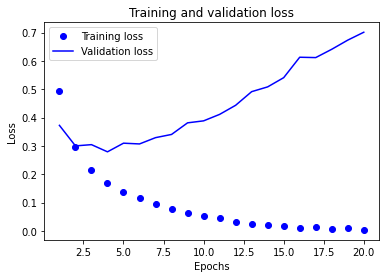

In [28]:
plot_loss(model_1_history)

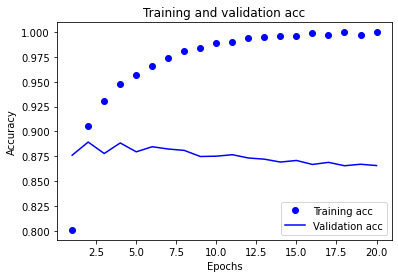

In [29]:
plot_accuracy(model_1_history)



**Analysis:** It's evident that the model achieved promising performance metrics throughout the training process. The training accuracy steadily increased over the epochs, reaching a high of approximately 99.98% by the final epoch. Similarly, the validation accuracy exhibited a consistent trend, peaking at around 86.53%. The training loss consistently decreased with each epoch, indicating effective learning and convergence of the model. However, the validation loss displayed a slight increase after the initial epochs, suggesting overfitting of the model. 

It's worth noting that the minimum validation loss is achieved after three epochs in this model's training process. This observation highlights a crucial aspect of model performance evaluation, indicating the epoch at which the model achieves its best performance in terms of minimizing validation loss.

In [30]:
print(np.argmin(model_1_history['val_loss']), "epochs")

3 epochs


### 6.2 Second neural network  <a class="anchor" id="m-2"></a>

**Strategy:** I opted to expedite the overfitting process by introducing an additional layer with 128 hidden units in each layer. This adjustment is anticipated to accelerate the validation loss reduction compared to our previous model, facilitating a more rapid convergence during training. Moreover, I made the deliberate choice to employ the hyperbolic tangent (tanh) activation function instead of rectified linear unit (ReLU), aiming to explore its potential impact on the model's performance. Additionally, I decided to experiment with the mean squared error (MSE) loss function, commonly utilized in regression tasks, to evaluate its effectiveness in the context of our classification problem. These modifications were made with the intention of gaining insights into the interplay between model architecture, activation functions, and loss functions, ultimately aiming to enhance the model's predictive capabilities.

[Neural network code](#nnc-2)

In [32]:
model_2_history = history.history
model_2_history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

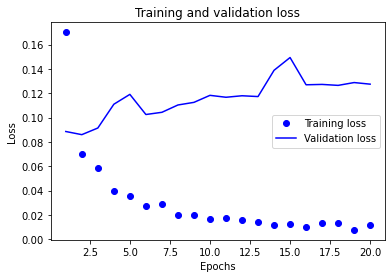

In [33]:
plot_loss(model_2_history)

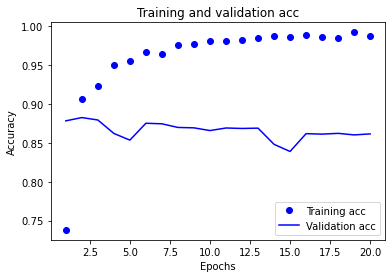

In [34]:
plot_accuracy(model_2_history)

#### Validation loss comparison between Model 1 And Model 2

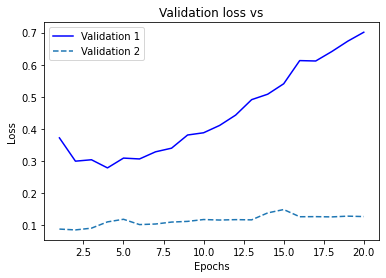

In [35]:
plot_loss_vs(model_1_history, model_2_history)

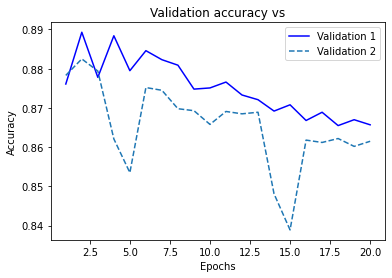

In [55]:
plot_acc_vs(model_1_history, model_2_history)

**Analysis:** The results demonstrate that the model achieves commendable accuracy metrics, boasting approximately 98.78% accuracy on the training dataset and 86.15% on the validation set after undergoing 20 epochs of training. However, in comparison to our initial neural network, the attained accuracy remains slightly lower. The consistent decline in loss during the initial epochs indicates that the model effectively assimilates and refines its performance over time. Nevertheless, as the training progresses, the validation loss reaches a plateau and even exhibits a slight upturn in the later epochs. This phenomenon is likely attributed to the inclusion of numerous layers and hidden units in the model architecture. While the model excels in training data, its performance in generalizing to new data is compromised. Therefore, there exists a trade-off between optimizing accuracy on the training set and ensuring the model's ability to generalize effectively to unseen data.

### 6.3 Third neural network  <a class="anchor" id="m-3"></a>

**Strategy:** I streamlined the neural network architecture by reducing the number of layers and hidden units to just four. This deliberate simplification is aimed at inducing underfitting during the training phase by limiting the computational complexity of the model. Additionally, I reverted to using the ReLU activation function for the first layer, intending to observe its performance. However, I decided to explore the ELU activation function for this particular case to compare its effects. Unlike ReLU, ELU does not squash negative values to zero but instead maps them to positive values, potentially allowing for a richer representation of the data. It's worth noting that ELU is computationally more expensive due to its utilization of exponential calculations, which can increase the computational overhead.  I reverted the loss function back to `binary_crossentropy`. This adjustment aims to evaluate the impact of activation functions on the model's performance and computational efficiency, providing insights into their respective advantages and limitations.

[Neural network code](#nnc-3)

In [37]:
model_3_history = history.history
model_3_history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

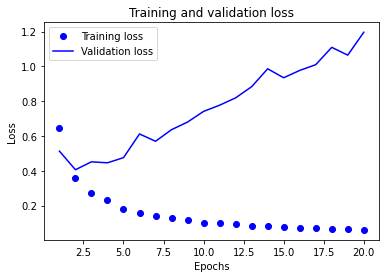

In [38]:
plot_loss(model_3_history)

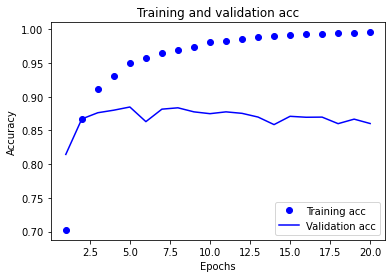

In [40]:
plot_accuracy(model_3_history)

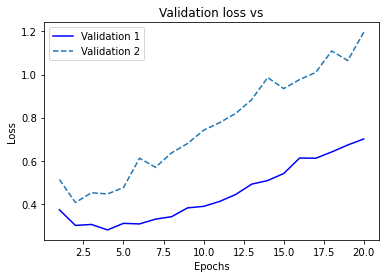

In [41]:
plot_loss_vs(model_1_history, model_3_history)

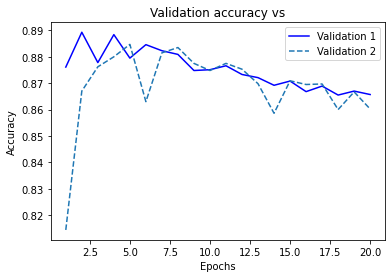

In [53]:
plot_acc_vs(model_1_history, model_3_history)

**Analysis:** Upon analyzing the loss values over the training epochs, it's clear that the model initially experiences a consistent reduction in loss, indicating effective learning and performance enhancement. However, as training continues, the validation loss starts to rise, hinting at a potential overfitting issue. Notably, the validation loss is higher compared to our first neural network. Additionally, the slope of this neural network appears steeper in comparison to the first model, likely due to its fewer layers and limited learning from the data. This increase in validation loss could be attributed to the model's architecture, featuring only four hidden units and employing the ELU activation function.

In [43]:
print(np.argmin(model_3_history['val_loss']), "epochs")

1 epochs


### 6.4 Fourth neural network  <a class="anchor" id="m-4"></a>

**Strategy:** In crafting the final model, I sought to maintain a semblance of continuity with the initial setup while also exploring avenues for improvement. By reducing the number of hidden units to 8, I aimed to streamline the model's complexity while still retaining its capacity to learn relevant patterns from the data. Additionally, the inclusion of a learning rate parameter in the optimizer allowed for more precise control over the training process, potentially optimizing the model's performance by adjusting the step size during gradient descent. This strategic adjustment was motivated by a desire to strike a balance between model complexity and generalization, ultimately aiming for a robust and effective solution to the problem at hand.

[Neural network code](#nnc-4)

In [44]:
model_4_history = history.history
model_4_history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

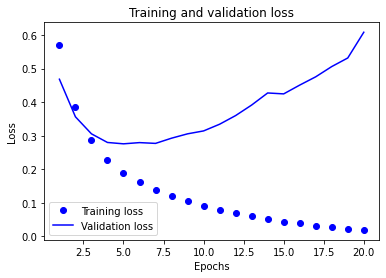

In [45]:
plot_loss(model_4_history)

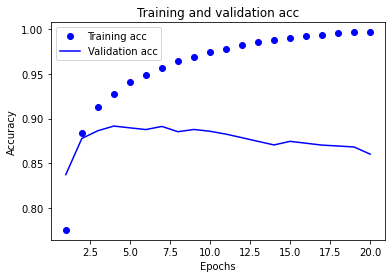

In [47]:
plot_accuracy(model_4_history)

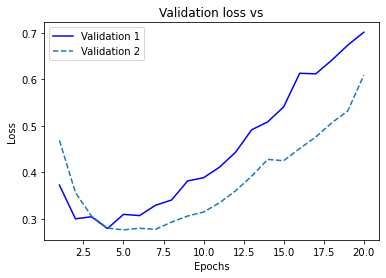

In [48]:
plot_loss_vs(model_1_history, model_4_history)

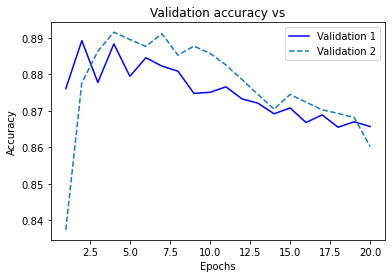

In [52]:
plot_acc_vs(model_1_history, model_4_history)

**Analysis:**  The model demonstrates a significant improvement in both training and validation accuracy, with the accuracy on the training data reaching approximately 99.65% and on the validation data reaching 86.02% after 20 epochs. This indicates that the model effectively learns and generalizes from the training data to some extent.

However, upon closer inspection, it's evident that the loss values behave differently during the training process. While the training loss steadily decreases, indicating effective learning and improvement in performance, the validation loss shows a gradual increase over the epochs. This increasing validation loss suggests a potential issue with overfitting.

Moreover, the validation accuracy does not improve significantly in later epochs, indicating limited learning from the data. This stagnation in validation accuracy suggests that the model may have reached its capacity to learn from the given dataset, and further training epochs may not yield significant improvements.

In contrast to the first neural network, this one exhibits similar validation performance, with both achieving relatively low validation scores. However, the accuracy achieved by this model surpasses that of the first one, particularly at the optimal number of epochs, which is four.

In [54]:
print(np.argmin(model_4_history['val_loss']), "epochs")

4 epochs


## 7 Regularizing your model and tuning your hyperparameters <a class="anchor" id="wf-7"></a>

In [ ]:
from tensorflow.keras import models
from tensorflow.keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512)

In [ ]:
# evaluate on the test set
test_loss, test_acc = model.evaluate(x_test, y_test)

In [ ]:
from tensorflow.keras import models
from tensorflow.keras import layers

model = models.Sequential()
model.add(layers.Dense(32, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=5, batch_size=512)

In [ ]:
# evaluate on the test set
test_loss, test_acc = model.evaluate(x_test, y_test)





## Results

## Evaluation

## Conclusion

## Modular code <a class="anchor" id="mc"></a>

### Imports

In [ ]:
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers

### Decode a review <a class="anchor" id="mc-1"></a>

In [ ]:
# Load the word index mapping
word_index = imdb.get_word_index()

# Reverse the word index mapping to map integers to words
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

# Decode a review from its list of word indices to text
def decode_review(review):
    # Decodes the review using the reverse word index mapping
    return ' '.join([reverse_word_index.get(i - 3, '?') for i in review])

### Vectorize Sequences <a class="anchor" id="mc-2"></a>

In [3]:
def vectorize_sequences(sequences, dimension = 10000):
    results = np.zeros( (len(sequences), dimension) )
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

### Plot Training and validation loss <a class="anchor" id="mc-3"></a>

In [4]:
import matplotlib.pyplot as plt

def plot_loss(history_dict):
    loss = history_dict['loss']
    val_loss = history_dict['val_loss']

    epochs = range(1, len(loss) + 1)

    plt.plot(epochs, loss, 'bo', label='Training loss')           
    plt.plot(epochs, val_loss, 'b', label='Validation loss')      
    plt.title('Training and validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.show()

### Plot training and validation accuracy <a class="anchor" id="mc-4"></a>

In [5]:
import matplotlib.pyplot as plt

def plot_accuracy(history_dict):
    acc = history_dict['accuracy']
    val_acc = history_dict['val_accuracy']

    epochs = range(1, len(acc) + 1)

    plt.plot(epochs, acc, 'bo', label='Training acc')           
    plt.plot(epochs, val_acc, 'b', label='Validation acc')    
    plt.title('Training and validation acc')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.show()

In [6]:
def plot_loss_vs(history_dict1, history_dict2):
    loss1 = history_dict1['val_loss']
    loss2 = history_dict2['val_loss']

    epochs = range(1, len(loss1) + 1)

    plt.plot(epochs, loss1, 'b', label='Validation 1')           
    plt.plot(epochs, loss2, '--', label='Validation 2')    
    plt.title('Validation loss vs')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.show()

In [51]:
def plot_acc_vs(history_dict1, history_dict2):
    acc1 = history_dict1['val_accuracy']
    acc2 = history_dict2['val_accuracy']

    epochs = range(1, len(acc1) + 1)

    plt.plot(epochs, acc1, 'b', label='Validation 1')           
    plt.plot(epochs, acc2, '--', label='Validation 2')    
    plt.title('Validation accuracy vs')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.show()

### Model one code  <a class="anchor" id="nnc-1"></a>

In [ ]:
model = models.Sequential()
model.add(layers.Dense(16, activation = 'relu', input_shape = (10000,)))
model.add(layers.Dense(16, activation = 'relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))

model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['accuracy'])

# shuffle
indices = np.arange(x_train.shape[0])
np.random.shuffle(indices)
x_train = x_train[indices]
y_train = y_train[indices]

# train
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

history = model.fit(partial_x_train, 
                    partial_y_train,
                    epochs = 20,
                    batch_size = 512,
                    validation_data = (x_val, y_val)) 

### Model two code  <a class="anchor" id="nnc-2"></a>

In [ ]:
model = models.Sequential()
model.add(layers.Dense(128, activation = 'tanh', input_shape = (10000,)))
model.add(layers.Dense(128, activation = 'tanh', input_shape = (10000,)))
model.add(layers.Dense(128, activation = 'tanh', input_shape = (10000,)))
model.add(layers.Dense(1, activation = 'sigmoid'))

model.compile(optimizer='rmsprop',
             loss='mse',
             metrics=['accuracy'])

# shuffle
indices = np.arange(x_train.shape[0])
np.random.shuffle(indices)
x_train = x_train[indices]
y_train = y_train[indices]

# train
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

history = model.fit(partial_x_train, 
                    partial_y_train,
                    epochs = 20,
                    batch_size = 512,
                    validation_data = (x_val, y_val)) 

### Model three code  <a class="anchor" id="nnc-3"></a>

In [ ]:
model = models.Sequential()
model.add(layers.Dense(4, activation = 'relu', input_shape = (10000,)))
model.add(layers.Dense(1, activation = 'elu'))

model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['accuracy'])

# shuffle
indices = np.arange(x_train.shape[0])
np.random.shuffle(indices)
x_train = x_train[indices]
y_train = y_train[indices]

# train
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

history = model.fit(partial_x_train, 
                    partial_y_train,
                    epochs = 20,
                    batch_size = 512,
                    validation_data = (x_val, y_val)) 

### Model fourth code  <a class="anchor" id="nnc-4"></a>

In [ ]:
model = models.Sequential()
model.add(layers.Dense(8, activation = 'relu', input_shape = (10000,)))
model.add(layers.Dense(8, activation = 'relu', input_shape = (10000,)))
model.add(layers.Dense(1, activation = 'sigmoid'))

model.compile(optimizer=optimizers.RMSprop(lr=0.001, momentum=0.0),
             loss='binary_crossentropy',
             metrics=['accuracy'])

# shuffle
indices = np.arange(x_train.shape[0])
np.random.shuffle(indices)
x_train = x_train[indices]
y_train = y_train[indices]

# train
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

history = model.fit(partial_x_train, 
                    partial_y_train,
                    epochs = 20,
                    batch_size = 512,
                    validation_data = (x_val, y_val)) 